## Load the modules

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import pmdarima as pm
from datetime import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

##  Import the dataset

In [46]:
df= pd.read_csv('INF.csv')
df.index  = pd.to_datetime(df.DATE,format='%Y/%m/%d')
data=df.drop('DATE',axis=1)
print(data)
training_set = data['1970-1-1' : '2019-12-1']
print(training_set)

                UK_INF
DATE                  
1970-01-01   100.00000
1970-02-01   100.51661
1970-03-01   101.10701
1970-04-01   102.65683
1970-05-01   102.95203
...                ...
2021-10-01  1394.81356
2021-11-01  1403.42352
2021-12-01  1410.80349
2022-01-01  1409.57349
2022-02-01  1419.41345

[626 rows x 1 columns]
                UK_INF
DATE                  
1970-01-01   100.00000
1970-02-01   100.51661
1970-03-01   101.10701
1970-04-01   102.65683
1970-05-01   102.95203
...                ...
2019-08-01  1332.08385
2019-09-01  1333.31385
2019-10-01  1332.08385
2019-11-01  1334.54384
2019-12-01  1334.54384

[600 rows x 1 columns]


## Dataset white noise check
The result show the p-value less than 0.05，so it passed the white noise test

In [7]:
print(acorr_ljungbox(data["UK_INF"], lags=1)) 


(array([622.93419667]), array([1.72021399e-137]))


## Time series plot

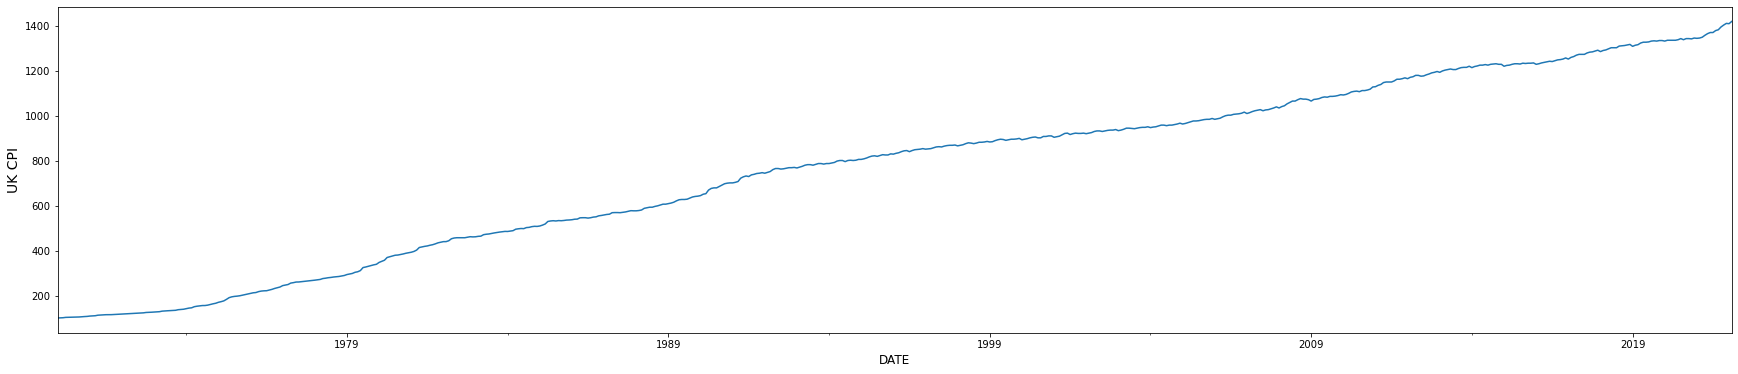

In [8]:
plt.figure(figsize = (30,6))
plt.xlabel('Date',fontsize=12,verticalalignment='top')
plt.ylabel('UK CPI',fontsize=14,horizontalalignment='center')
data["UK_INF"].plot()
plt.show()


## Data Stationary Series Check
the plot shows a obvious upward trend.The T.S. seems not stationary.

<Figure size 432x288 with 0 Axes>

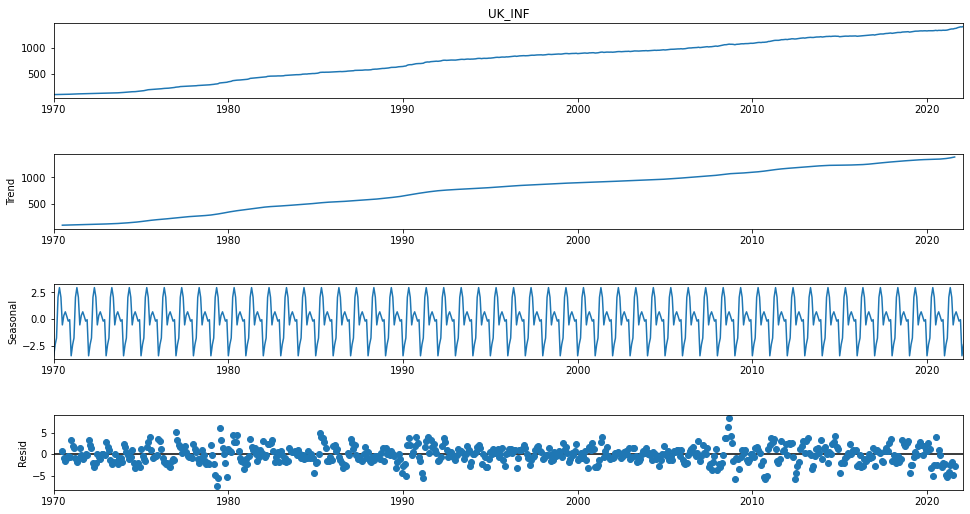

In [10]:
decomposition = seasonal_decompose(data["UK_INF"], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

The ADF test result show the p-value as 0.948，so it is not Stationary Series

In [11]:
from arch.unitroot import ADF
ADF(data["UK_INF"])


Test Statistic,-0.117
P-value,0.948
Lags,15


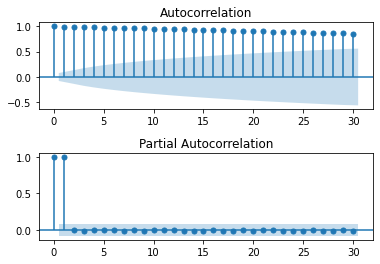

In [12]:
def draw_acf_pacf(ts,lags):

    f = plt.figure(facecolor='white')

    ax1 = f.add_subplot(211)

    plot_acf(ts,ax=ax1,lags=lags)

    ax2 = f.add_subplot(212)

    plot_pacf(ts,ax=ax2,lags=lags)

    plt.subplots_adjust(hspace=0.5)

    plt.show()

draw_acf_pacf(data["UK_INF"],30)

## Difference
The p-value is 0.01 <0.05, so it is Stationary Series after one time difference

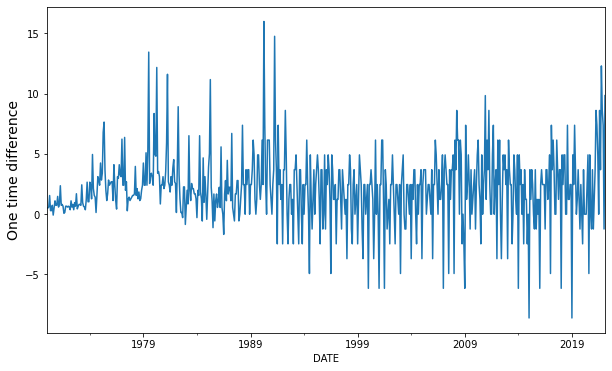

Test Statistic,-3.420
P-value,0.010
Lags,14


In [92]:
data_diff=data["UK_INF"].diff(1)
plt.figure(figsize=(10, 6))
data_diff.plot()
plt.ylabel('One time difference',fontsize=14,horizontalalignment='center')
plt.show()

data_diff1 = np.diff(data["UK_INF"])
ADF(data_diff1)


## Draw the acf and pacf

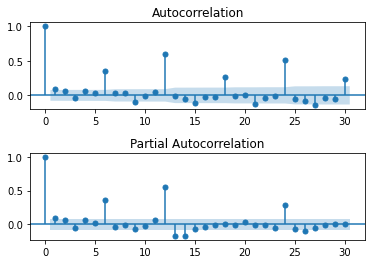

In [21]:
def draw_acf_pacf(ts,lags):

    f = plt.figure(facecolor='white')

    ax1 = f.add_subplot(211)

    plot_acf(ts,ax=ax1,lags=lags)

    ax2 = f.add_subplot(212)

    plot_pacf(ts,ax=ax2,lags=lags)

    plt.subplots_adjust(hspace=0.5)

    plt.show()

draw_acf_pacf(data_diff1,30)

## ARIMA pdq define with smallest AIC
The best model is ARIMA(order=(2, 1, 2))

In [47]:
model=pm.auto_arima(training_set,trace=True)
model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2853.309, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2949.485, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2946.388, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2946.740, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3202.596, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2876.194, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2882.805, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2877.581, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2871.547, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2948.232, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2871.082, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2877.501, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2891.423, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

## get the model result 

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1420.655
Date:                Thu, 05 May 2022   AIC                           2853.309
Time:                        15:34:26   BIC                           2879.681
Sample:                             0   HQIC                          2863.576
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9224      0.111     17.367      0.000       1.705       2.139
ar.L1          0.9890      0.007    136.938      0.000       0.975       1.003
ar.L2         -0.9885      0.008   -131.589      0.000      -1.003      -0.974
ma.L1         -0.9506      0.020    -47.830      0.000      -0.990      -0.912
ma.L2          0.9577      0.019     49.461      0.000       0.920       0.996
sigma2         6.4026      0.253     25.349      0.000       5.908       6.898
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               247.74
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residual white noise check and diagnostics
p-value is 64720955>>0.05 ,so the residual is white noise

In [91]:
from statsmodels.stats.diagnostic import acorr_ljungbox
resid = model.resid()
print(acorr_ljungbox(resid, lags=1)) 


(array([0.20943634]), array([0.64720955]))


The residual distribution is close to normal distribution. But the QQ plot shows there might be ARCH effect.

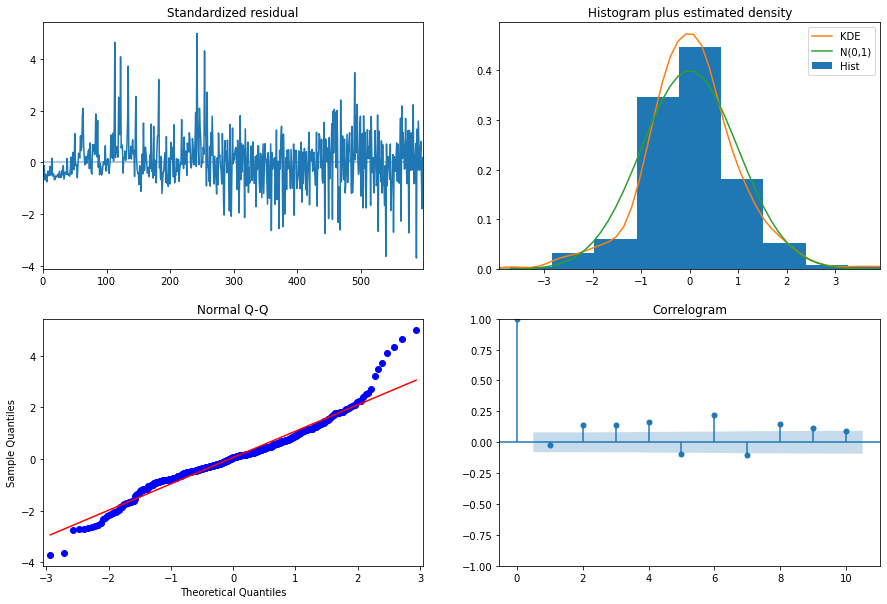

In [50]:
model.plot_diagnostics(figsize = (15, 10))
plt.show()

## Predict with best PDQ arima model

In [52]:
model.predict(n_periods=26)

array([1335.20818598, 1337.09645329, 1340.22961166, 1343.38413356,
       1345.32922716, 1346.05708374, 1346.77660037, 1348.69108992,
       1351.79564659, 1354.89596122, 1356.81571644, 1357.57209655,
       1358.34486946, 1360.28383415, 1363.35995356, 1366.40795056,
       1368.30407366, 1369.08879694, 1369.91296112, 1371.87473475,
       1374.92261259, 1377.92013247, 1379.79425031, 1380.60710638,
       1381.48084564, 1383.46383998])

In [67]:
forecast = model.predict(n_periods=26)
forecast = pd.DataFrame(forecast,index = pd.date_range('2020-1-1',periods=26,freq='MS'),columns=['Prediction'])
forecast

,Prediction
2020-01-01,1335.208186
2020-02-01,1337.096453
2020-03-01,1340.229612
2020-04-01,1343.384134
2020-05-01,1345.329227
2020-06-01,1346.057084
2020-07-01,1346.776600
2020-08-01,1348.691090
2020-09-01,1351.795647
2020-10-01,1354.895961


## visualization

In [69]:
## get the fitted values
fitted = pd.DataFrame(np.array(training_set.values.T-resid).T,index = training_set.index,columns=['fitted'])
fitted

,fitted
DATE,
1970-01-01,1.923348
1970-02-01,101.923394
1970-03-01,102.343135
1970-04-01,102.981023
1970-05-01,104.717756
...,...
2019-08-01,1330.017971
2019-09-01,1335.269099
2019-10-01,1336.642265


In [73]:
real_data = data['2020-1-1' : '2022-2-1']
real_data

,UK_INF
DATE,
2020-01-01,1332.08385
2020-02-01,1335.77384
2020-03-01,1335.77384
2020-04-01,1335.77384
2020-05-01,1335.77384
2020-06-01,1338.23382
2020-07-01,1343.15380
2020-08-01,1338.23382
2020-09-01,1343.15380


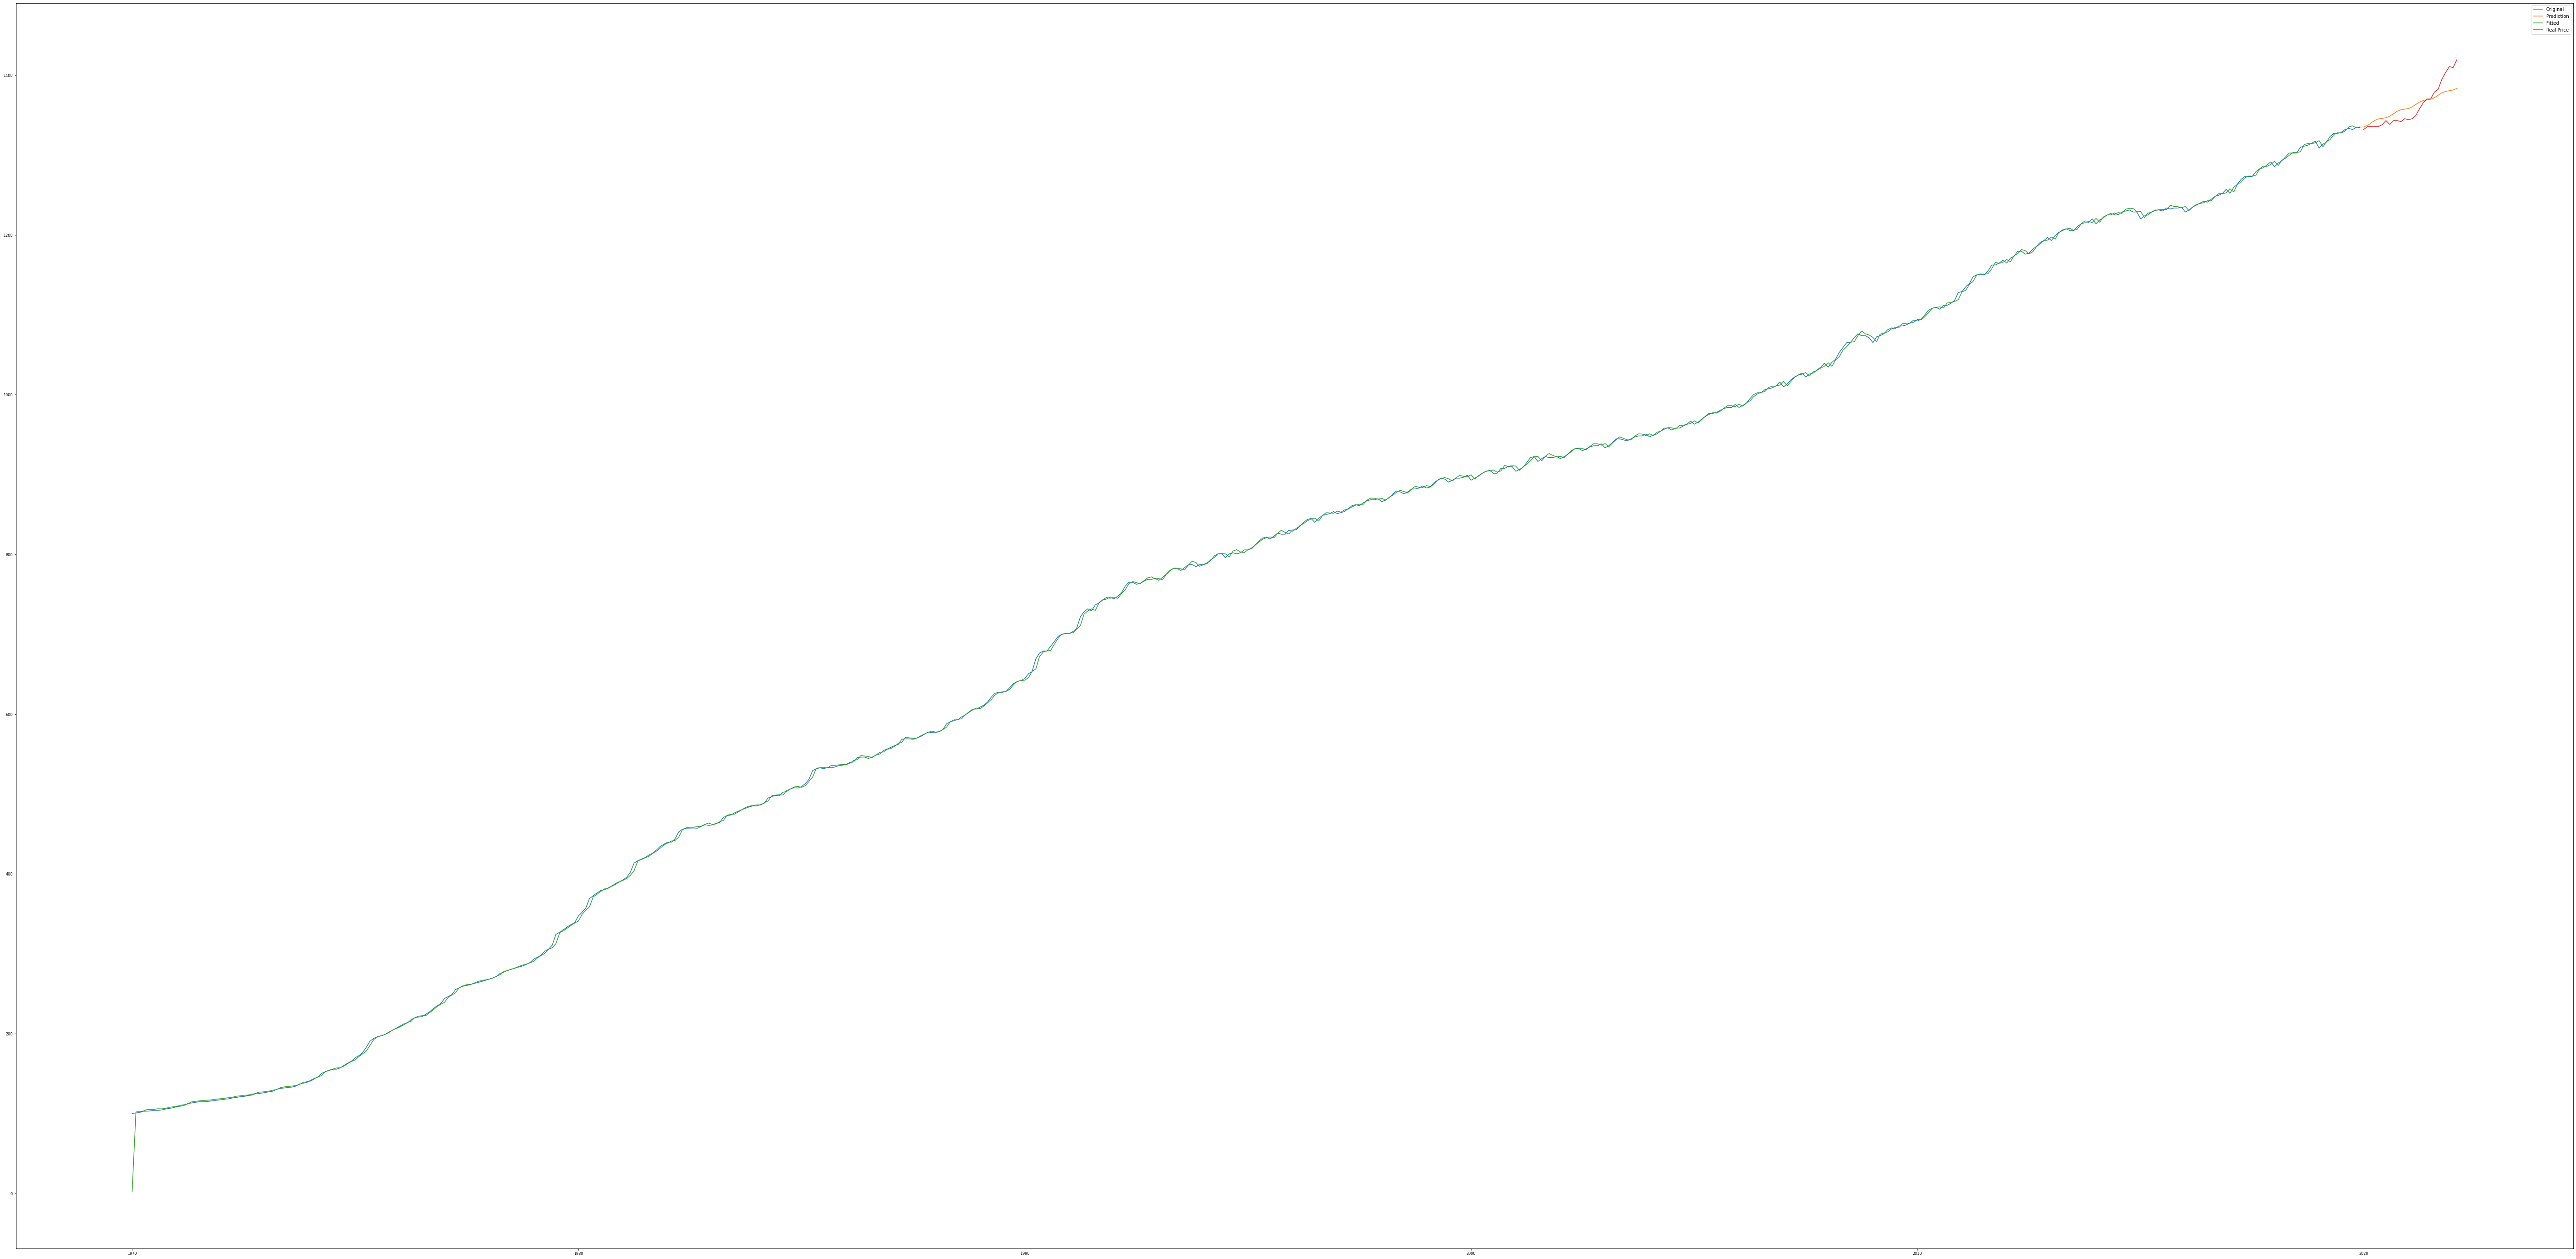

In [74]:
fig=plt.figure(figsize = (100,50))
ax1=fig.add_subplot(1,1,1) 
plt.plot(training_set, label='Original')
plt.plot(forecast, label='Prediction')
plt.plot(fitted,label="Fitted")
plt.plot(real_data,label="Real Price")
plt.tick_params(axis='both',which='major',labelsize=8)
plt.legend()
plt.show()

## Index calculate
MAPE show the 0.507%,the model is in very good performance

In [84]:
MSE = np.mean(np.square(training_set.values - fitted.values))
RMSE = np.sqrt(np.mean(np.square(training_set.values - fitted.values)))
MAE = np.mean(np.abs(training_set.values - fitted.values))
MAPE = np.mean(np.abs((training_set.values - fitted.values) / training_set.values)) * 100

In [85]:
print (MSE,RMSE,MAE,MAPE)

22.726284232350785 4.767209270878591 2.024447899348238 0.5074111876720452


## ARIMA(2,1,2)-GARCH(1,1) model fitting

LM test shows the resideual has ARCH effect. Try to use standard GARCH(1,1) model to fit the residual.

In [86]:
from statsmodels.stats.diagnostic import het_arch
LM_pvalue = het_arch(resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.00000


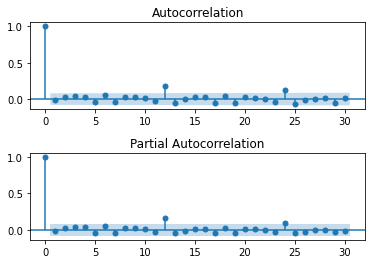

In [87]:
draw_acf_pacf(resid,30)

In [88]:
from arch.univariate import arch_model
garch = arch_model(resid, mean='constant', p=1, o=0, q=1,vol='GARCH')
garch_model=garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37579.32410477454
Iteration:      2,   Func. Count:     13,   Neg. LLF: 518194142.6739533
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2059.3326042596664
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1473.8094250022564
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1445.768234342358
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1444.0017948716902
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1443.3766804370966
Iteration:      8,   Func. Count:     47,   Neg. LLF: 1443.3340251357713
Iteration:      9,   Func. Count:     52,   Neg. LLF: 1443.3289267334485
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1443.3121191755358
Iteration:     11,   Func. Count:     62,   Neg. LLF: 1443.3081722608254
Iteration:     12,   Func. Count:     67,   Neg. LLF: 1443.3073345030907
Iteration:     13,   Func. Count:     72,   Neg. LLF: 1443.3071929089651
Iteration:     14,   Func. Count:     77,   Neg. LLF: 

In [89]:
garch_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1443.31
Distribution:                  Normal   AIC:                           2894.61
Method:            Maximum Likelihood   BIC:                           2912.20
                                        No. Observations:                  600
Date:                Thu, May 05 2022   Df Residuals:                      599
Time:                        16:13:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1538      0.107      1.440      0.150 [-5.549e-02,  0.363]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.9877      0.833      3.585  3.368e-04      [  1.354,  4.621]
alpha[1]       0.0000  1.645e-02      0.000      1.000 [-3.223e-02,3.223e-02]
beta[1]        0.5560      0.127      4.393  1.119e-05      [  0.308,  0.804]
=============================================================================

Covariance estimator: robust
"""

[ 9.79228584e+01 -1.56057791e+00 -1.38991899e+00 -4.77986738e-01
 -1.91951955e+00 -1.88482071e+00 -1.33882876e+00 -2.11344653e+00
 -1.50250787e+00 -1.01223972e+00 -1.48460026e+00 -1.42832058e+00
 -5.61380282e-01 -1.41930045e+00 -1.12364457e+00  2.60752293e-01
 -1.50855849e+00 -1.31702505e+00 -1.31229390e+00 -1.85899106e+00
 -1.86608094e+00 -1.49685145e+00 -1.58212691e+00 -1.57174177e+00
 -1.33174620e+00 -1.33619888e+00 -1.64140077e+00 -1.03856521e+00
 -1.64856357e+00 -1.33068302e+00 -1.62531112e+00 -9.57576901e-01
 -1.36462433e+00 -4.70566058e-01 -1.80907972e+00 -1.43745701e+00
 -1.12831325e+00 -1.11594139e+00 -1.32481772e+00  2.37020107e-01
 -1.31426904e+00 -1.42342692e+00 -1.29360602e+00 -1.50773349e+00
 -8.75659152e-01  3.81715779e-01 -1.30910443e+00 -1.04314994e+00
  8.37200827e-01  5.10245567e-01 -8.70127841e-01  2.68490114e+00
 -2.18445846e-01 -4.88790633e-01 -3.57864983e-01 -1.66962970e+00
 -3.61786181e-01  7.46638179e-01  4.06958945e-01  2.81457796e-01
  2.46673937e+00  1.00563

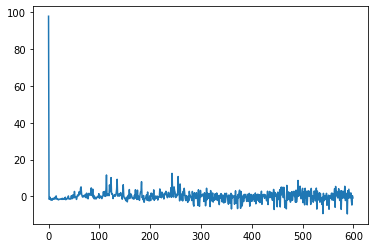

In [90]:
garch_resid=garch_model.resid
print(garch_resid)
plt.plot(garch_resid)